`March 31, 2022`

### **KNN & Decision Tree Exercise**

#### **Use 'cancer' dataset**

- Explore the data and do preprocessing first.

- To simplify, only use 'texture_mean' and 'concave_points_mean' feature with 20% test set and random_state = 42.

        - Features: 'texture_mean', 'concave points_mean'
        - Target: 'diagnosis'
  
- Find the best K value for the KNN model, then calculate and compare accuracy of the model with and without scaling process. 
- Interpret the result!


- For decision tree model, apply hyperparameters as follows:
        
        - max_depth = 2 
        - criterion = 'gini' 

        Compare the model performance to KNN. Which one is better in this case?

- Interpret the result!

[Dataset source](https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+(Diagnostic))

<hr>

#### **Import libraries**

In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler

from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree

from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score, roc_curve, roc_auc_score
from sklearn.metrics import confusion_matrix, plot_confusion_matrix, precision_recall_curve, ConfusionMatrixDisplay, RocCurveDisplay, PrecisionRecallDisplay 

import warnings
warnings.filterwarnings('ignore')

#### **Load dataset**

In [2]:
df = pd.read_csv('cancer_data.csv')
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


#### **Data exploration**

In [3]:
# Check dataset info.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [4]:
# Check duplicated data.
df.duplicated().sum()

0

In [5]:
# Convert label into numerical value.
# Malignant = 1, Benign = 0
df['diagnosis'] = df['diagnosis'].apply(lambda x: 1 if x == 'M' else 0)

In [6]:
# Check the result and proportion.
df['diagnosis'].value_counts()

0    357
1    212
Name: diagnosis, dtype: int64

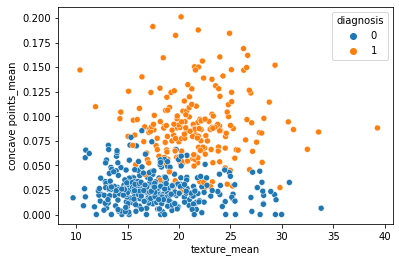

In [7]:
# Data distribution regarding diagnosis results.
sns.scatterplot(x='texture_mean', y='concave points_mean', data=df, hue='diagnosis');

In [8]:
features = ['texture_mean', 'concave points_mean']
target = ['diagnosis']

X = df[features]
y = df[target]

#### **Data splitting**

In [9]:
X_train, X_test, y_train, y_test = train_test_split(
    X, 
    y, 
    stratify = y, 
    test_size = 0.2, 
    random_state = 42)

#### **KNN**

**Without scaling**

In [10]:
# Initialize the model with k = 3.
knn = KNeighborsClassifier(n_neighbors=3)

# Train the model.
knn.fit(X_train, y_train)

# Predict the test set.
y_predict_class = knn.predict(X_test)

In [11]:
print('Model accuracy of the test dataset:', accuracy_score(y_test, y_predict_class))

Model accuracy of the test dataset: 0.7719298245614035


**With scaling**

In [12]:
# Define scaler.
scaler = MinMaxScaler()

# Fit scaler.
scaler.fit(X_train) # Fitting is only apllied to training data.

# Transform the data.
X_train_scaled = scaler.transform(X_train) # transform X_train data 
X_test_scaled = scaler.transform(X_test) # transform x_test data

In [13]:
# Initialize model with k = 3.
knn = KNeighborsClassifier(n_neighbors=3)

# Train the model.
knn.fit(X_train_scaled, y_train)

# Predict the test set.
y_predict_class = knn.predict(X_test_scaled)

In [14]:
print('Model accuracy with scaled data of the test dataset:', accuracy_score(y_test, y_predict_class))

Model accuracy with scaled data of the test dataset: 0.9210526315789473


`Interpretation`

The model's accuracy by using only two features and scaled data is about 92.1%. The accuracy is much better compared to the one without data scaling, which is only around 77.1%.

#### **The best k factor**

In [15]:
# The best k factor can be approximated by square rooting the number of total data.
df.shape[0]**.5 

23.853720883753127

In [16]:
# Check error of each k.
df_k_result = pd.DataFrame(columns=['k', 'Train Error', 'Test Error'])

k_list = list(range(1, 30, 2))

for k in k_list:
    knn_classifier = KNeighborsClassifier(n_neighbors=k, metric='euclidean')
    knn_classifier.fit(X_train_scaled, y_train)
    train_error = 1 - knn_classifier.score(X_train_scaled, y_train)
    test_error = 1 - knn_classifier.score(X_test_scaled, y_test)
    
    df_k_result = df_k_result.append({
        'k': k,
        'Train Error': train_error,
        'Test Error': test_error
    }, ignore_index=True)

In [17]:
df_k_result

,k,Train Error,Test Error
0,1.0,0.000000,0.122807
1,3.0,0.057143,0.078947
2,5.0,0.061538,0.061404
3,7.0,0.061538,0.061404
4,9.0,0.061538,0.052632
5,11.0,0.061538,0.052632
6,13.0,0.061538,0.052632
7,15.0,0.063736,0.061404
8,17.0,0.061538,0.061404
9,19.0,0.068132,0.061404


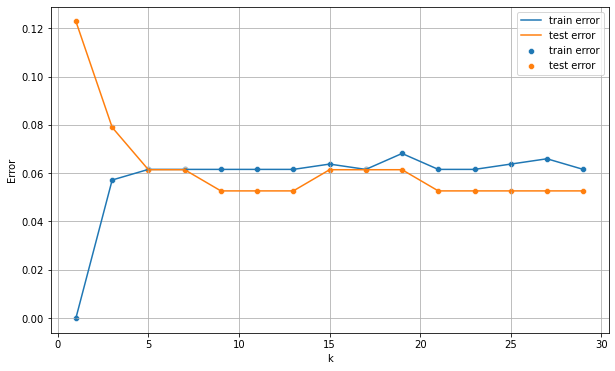

In [18]:
# Plot the errors.
fig, ax = plt.subplots(figsize=(10, 6))
sns.lineplot(x='k', y='Train Error', data=df_k_result, ax=ax, label='train error')
sns.scatterplot(x='k', y='Train Error', data=df_k_result, ax=ax, label='train error')
sns.lineplot(x='k', y='Test Error', data=df_k_result, ax=ax, label='test error')
sns.scatterplot(x='k', y='Test Error', data=df_k_result, ax=ax, label='test error')
plt.legend()
plt.ylabel('Error')
plt.grid();

In [19]:
# Find the best k.
k = range(1, 30, 2)
testing_accuracies = []
training_accuracies = []
score = 0

for i in k:
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(X_train_scaled, y_train)

    y_predict_train = knn.predict(X_train_scaled)
    training_accuracies.append(accuracy_score(y_train, y_predict_train))

    y_predict_test = knn.predict(X_test_scaled)
    acc_score = accuracy_score(y_test, y_predict_test)
    testing_accuracies.append(acc_score)

    if score < acc_score:
        score = acc_score
        best_k = i

    print(i, score)


1 0.8771929824561403
3 0.9210526315789473
5 0.9385964912280702
7 0.9385964912280702
9 0.9473684210526315
11 0.9473684210526315
13 0.9473684210526315
15 0.9473684210526315
17 0.9473684210526315
19 0.9473684210526315
21 0.9473684210526315
23 0.9473684210526315
25 0.9473684210526315
27 0.9473684210526315
29 0.9473684210526315


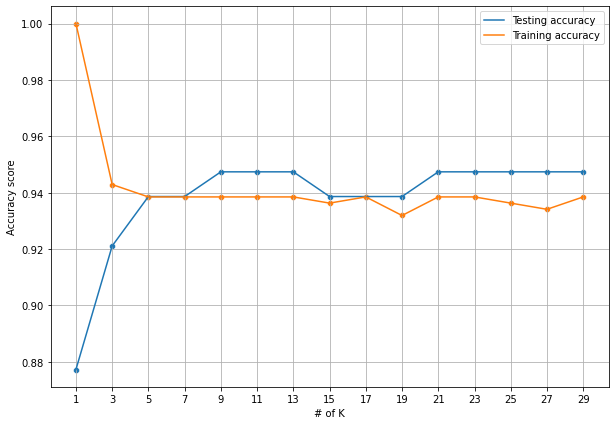

In [20]:
# Plot the accuracies result.
plt.figure(figsize=(10, 7))
sns.lineplot(k, testing_accuracies)
sns.scatterplot(k, testing_accuracies)
sns.lineplot(k, training_accuracies)
sns.scatterplot(k, training_accuracies)
plt.legend(['Testing accuracy', 'Training accuracy'])
plt.xlabel('# of K')
plt.ylabel('Accuracy score')
plt.xticks(list(k))
plt.grid();

In [21]:
# The best K with its score.
print('The best k factor:', best_k)
print('Accuracy score:', score)

The best k factor: 9
Accuracy score: 0.9473684210526315


`Interpretation`

As shown in the plot above, the best k factor is 9, with an accuracy score of about 95%. The larger the k, the trend of training and test set accuracies tend to fluctuate and not even better than k = 9. 

However, with k = 9, we got the testing accuracy higher than the training. Thus, we may be skeptical about this. By looking at the figure alone, k = 5 may be the best k factor of this case since the accuracies between the training and testing set are pretty similar, around 93%.

#### **Decision Tree**

In [22]:
# Define the model.
tree = DecisionTreeClassifier(
    criterion='gini',
    max_depth=2
)

In [23]:
# Train the model.
tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2)

In [24]:
# Test the model with the test set.
y_predict_class = tree.predict(X_test)

In [25]:
# Metric result.
print('Model accuracy of the test dataset:', accuracy_score(y_test, y_predict_class))

Model accuracy of the test dataset: 0.8859649122807017


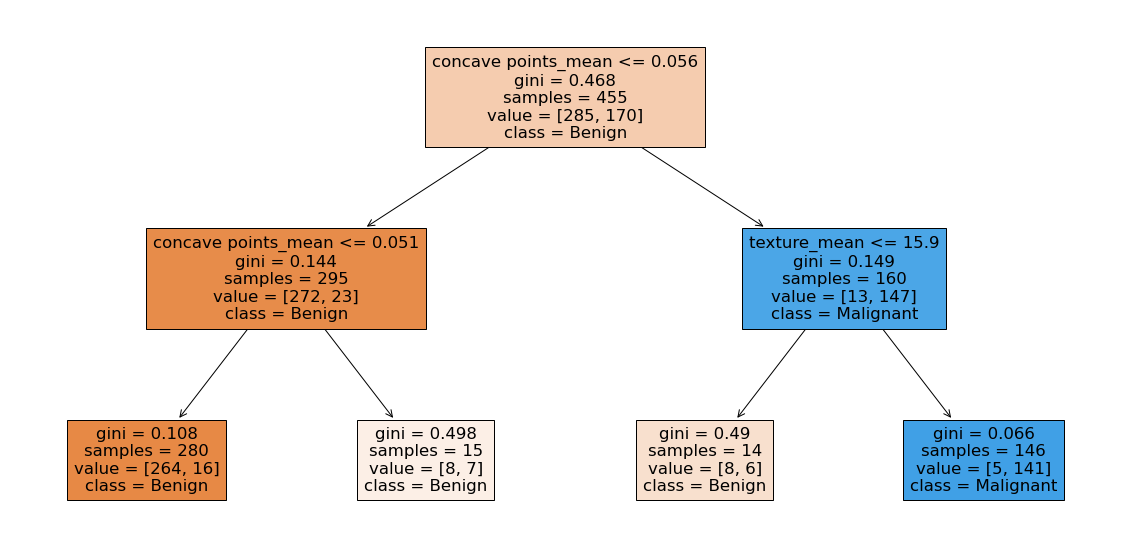

In [26]:
# Tree plot.
plt.figure(figsize=(20, 10))
plot_tree(tree, feature_names= list(X), class_names= ['Benign', 'Malignant'], filled=True);

`Interpretation`

**True**
1. concave points_mean <= 0.056, concave points_mean <= 0.051 (True) --> Benign
2. concave points_mean <= 0.056, concave points_mean <= 0.051 (False) --> Benign

**False**
1. concave points_mean <= 0.056, texture_mean <= 15.9 (True) --> Benign
2. concave points_mean <= 0.056, texture_mean <= 15.9 (False) --> Malignant

Some of the last nodes have a high gini number, which means the nodes are relatively heterogenous. Therefore, we need a deeper tree in this case.

**With scaling**

In [27]:
# Define scaler.
scaler = MinMaxScaler()

# Fit the scaler.
scaler.fit(X_train) # preprocess fit

# Transform data.
X_train_scaled = scaler.transform(X_train) 
X_test_scaled = scaler.transform(X_test)

In [28]:
tree = DecisionTreeClassifier(
    criterion='gini',
    max_depth=2
)

In [29]:
# Fit and predict.
tree.fit(X_train_scaled, y_train)
y_predict_class = tree.predict(X_test_scaled)

In [30]:
# Metric result.
print('Model accuracy of the test dataset with scaling:', accuracy_score(y_test, y_predict_class))

Model accuracy of the test dataset with scaling: 0.8859649122807017


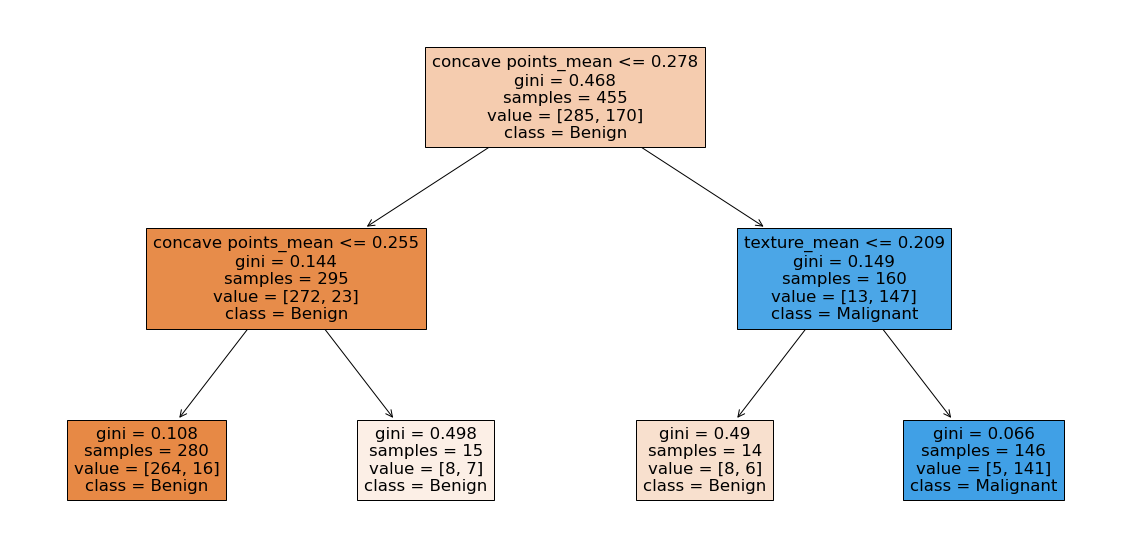

In [31]:
# Tree plot.
plt.figure(figsize=(20, 10))
plot_tree(tree, feature_names= list(X), class_names= ['Benign', 'Malignant'], filled=True);

**Without max_depth**

In [32]:
# Define the model.
tree_max = DecisionTreeClassifier(
    criterion='gini'
)

# Train the model.
tree_max.fit(X_train_scaled, y_train)

# Predict the test set.
y_predict_class = tree_max.predict(X_test_scaled)

In [33]:
# Metric result.
print('Model accuracy of the test dataset:', accuracy_score(y_test, y_predict_class))

Model accuracy of the test dataset: 0.9035087719298246


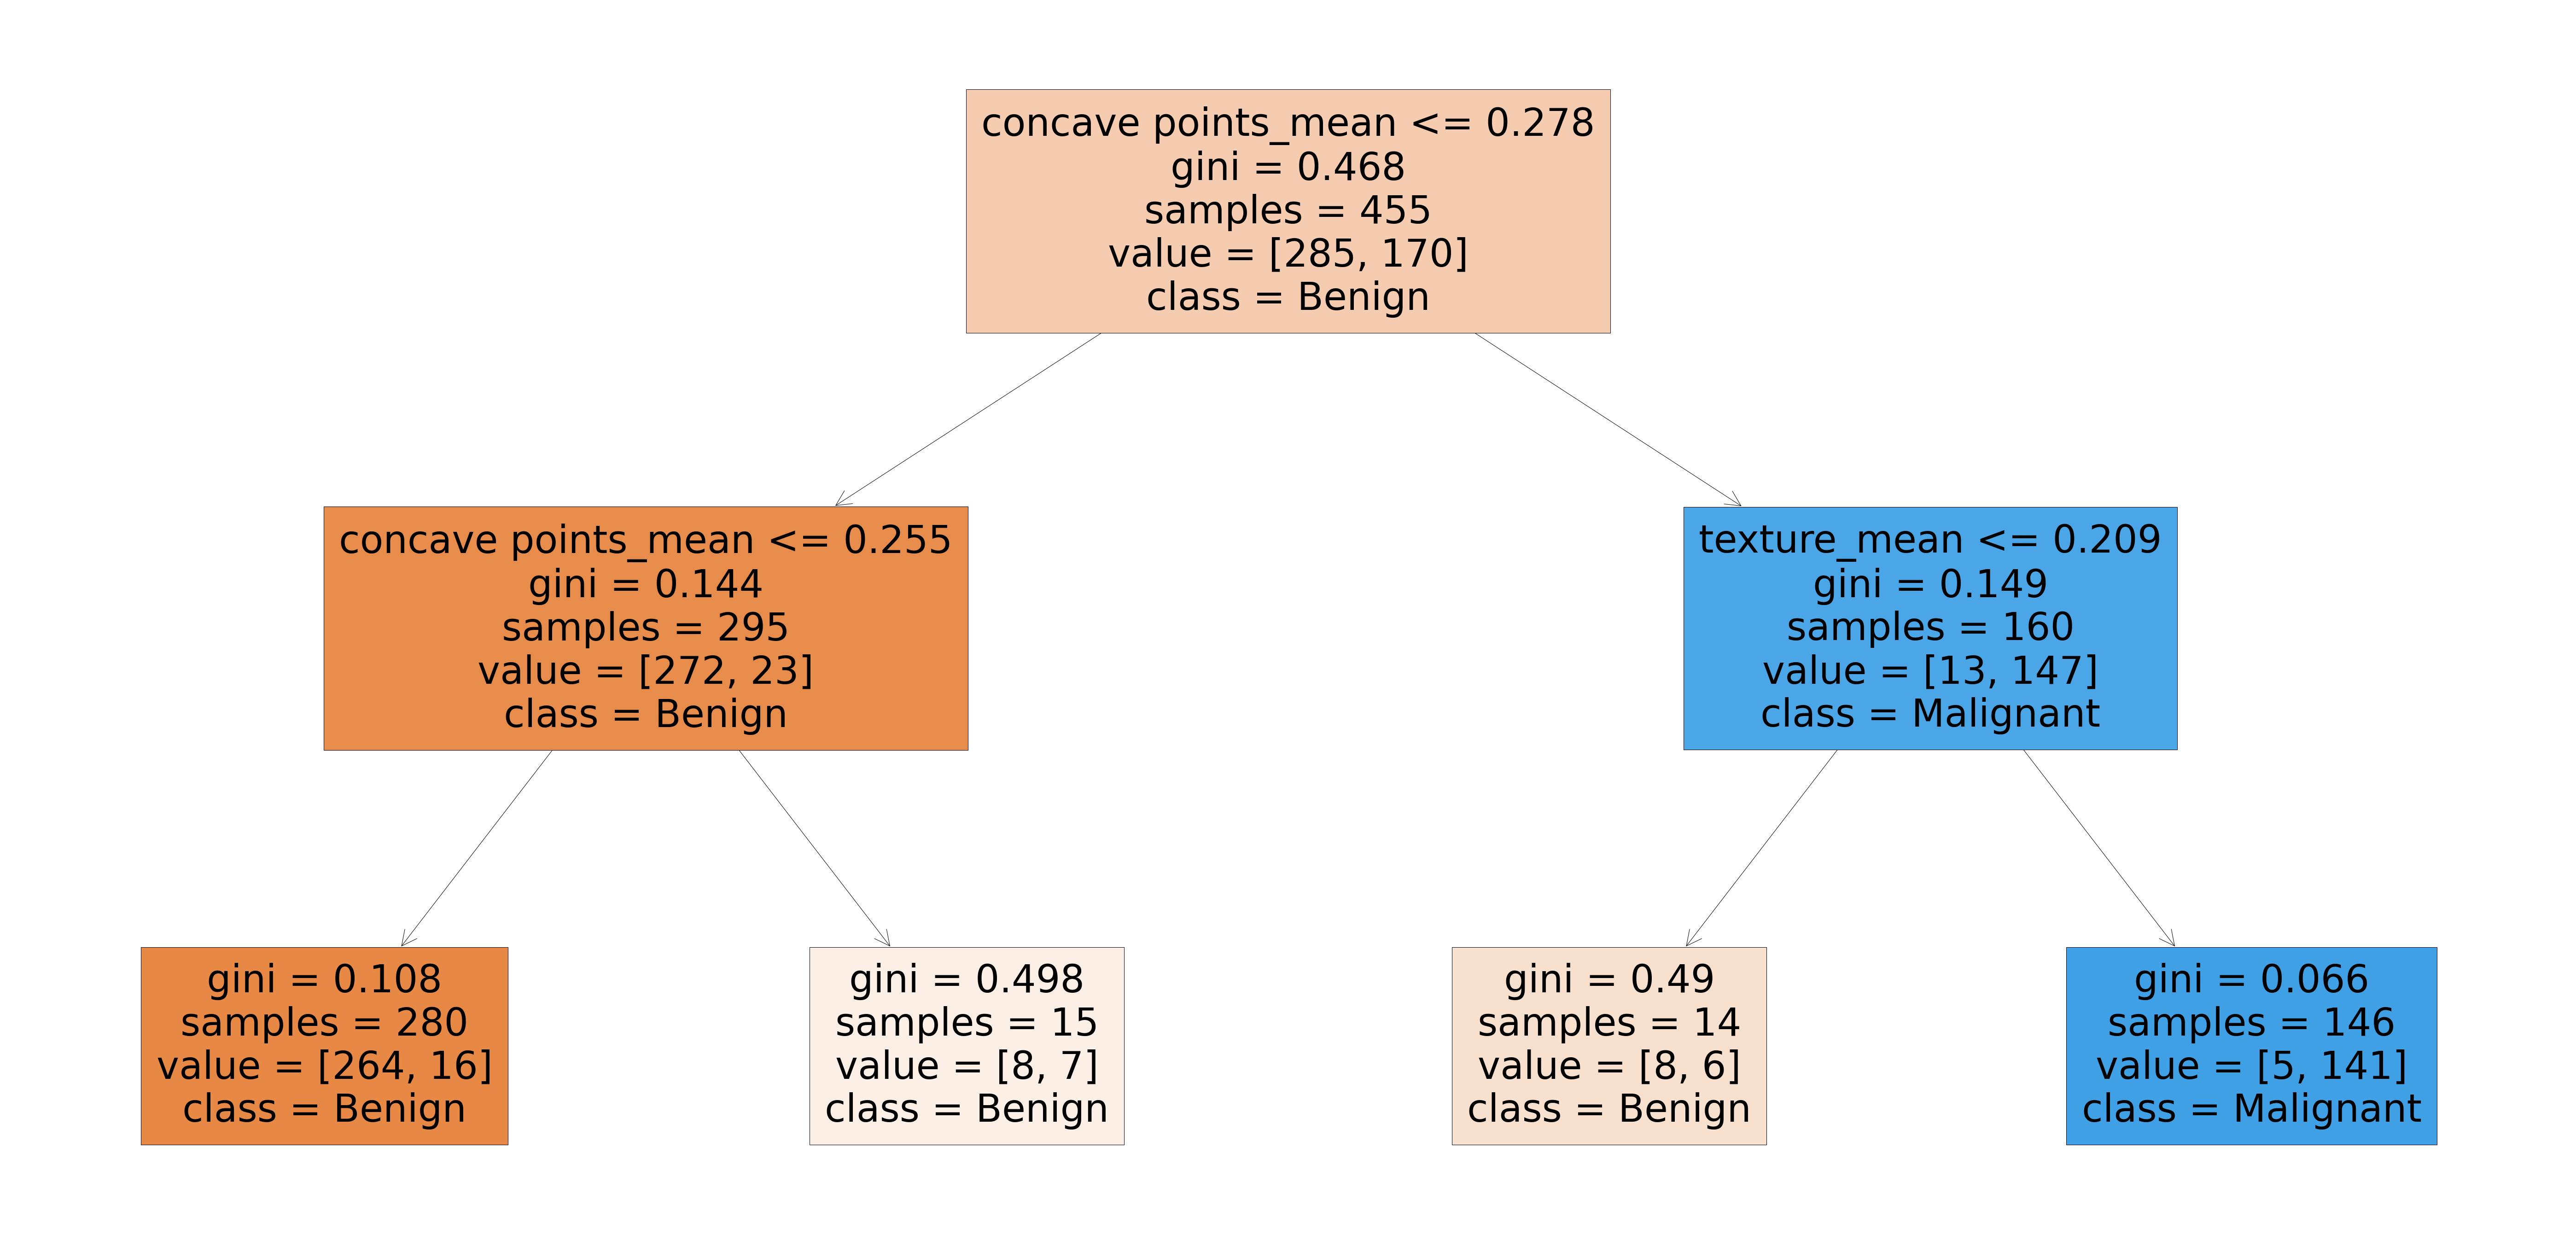

In [34]:
# Plot the tree.
plt.figure(figsize=(100, 50))
plot_tree(tree, feature_names= list(X), class_names= ['Benign', 'Malignant'], filled=True);

**`Interpretation`**

Using a decision tree model with a maximum depth of 2, we got an accuracy score of 88.5%. Then we tried to scale the data, but the accuracy score did not improve. In other words, scaling does not change the heterogeneous data in each node. It can be said that a decision tree model does not need data scaling.

We also have done building a tree without defining its maximum depth. As shown in the tree plot above, branching is continued up to a depth of 11, and gini scores become 0 at the last nodes. It undoubtedly influences the accuracy score (~90%), but the model becomes harder to interpret.

Lastly, according to the accuracy scores from the models, we can say that the KNN model with data scaling is better than the decision tree model in predicting cancer diagnosis by using only two features.

#### **Model Performance Evaluation**

In [35]:
log_reg = LogisticRegression(random_state=42, max_iter=1000, solver='liblinear')
log_reg.fit(X_train_scaled, y_train)

y_train_pred = log_reg.predict(X_train_scaled)
y_train_proba_pred = log_reg.predict_proba(X_train_scaled)

# Confusion matrix
log_reg_confusion = confusion_matrix(y_train, y_train_pred)

In [ ]:
y_train_pred

In [ ]:
y_train_proba_pred

In [38]:
log_reg_confusion

array([[281,   4],
       [ 33, 137]], dtype=int64)

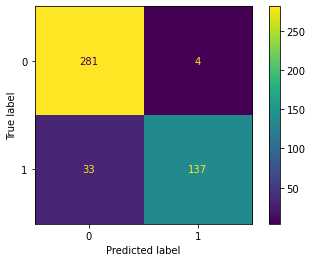

In [43]:
ConfusionMatrixDisplay(log_reg_confusion).plot();

In [46]:
print(f'Precision score: {precision_score(y_train, y_train_pred)}')
print(f'Recall score: {recall_score(y_train, y_train_pred)}')
print(f'F1 score: {f1_score(y_train, y_train_pred)}')

Precision score: 0.9716312056737588
Recall score: 0.8058823529411765
F1 score: 0.8810289389067525


- 97.1% pasien yang diprediksi mengidap kanker, benar-benar mengidap kanker.
- Hanya 80.5% pasien yang mengidap kanker yang dapat diprediksi sebagai pengidap kanker oleh model.

In [79]:
df_prc = pd.DataFrame(precision_recall_curve(y_train, y_train_proba_pred[:, 1])).T.rename(columns=({0:'precision', 1:'recall', 2:'threshold'}))

In [80]:
df_prc

,precision,recall,threshold
0,0.598592,1.000000,0.185767
1,0.597173,0.994118,0.186350
2,0.599291,0.994118,0.186704
3,0.601423,0.994118,0.186735
4,0.603571,0.994118,0.187093
...,...,...,...
280,1.000000,0.023529,0.992045
281,1.000000,0.017647,0.993923
282,1.000000,0.011765,0.994777
283,1.000000,0.005882,0.995786


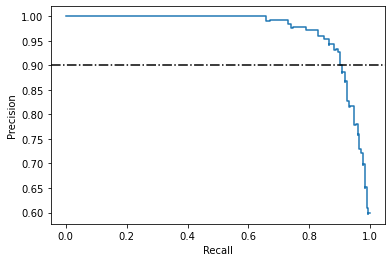

In [89]:
PrecisionRecallDisplay(df_prc['precision'], df_prc['recall']).plot()
plt.axhline(y=0.9, ls='-.', color='black');

In [90]:
df_prc[df_prc['precision'] >= 0.9]

,precision,recall,threshold
113,0.900585,0.905882,0.396244
114,0.900000,0.900000,0.396435
115,0.905325,0.900000,0.396988
116,0.910714,0.900000,0.401141
117,0.916168,0.900000,0.402512
...,...,...,...
280,1.000000,0.023529,0.992045
281,1.000000,0.017647,0.993923
282,1.000000,0.011765,0.994777
283,1.000000,0.005882,0.995786


In [91]:
new_threshold = 0.396244
final_prediction = []

for proba in y_train_proba_pred[:, 1]:
    if proba >= new_threshold:
        final_prediction.append(1)
    else:
        final_prediction.append(0)

print(final_prediction, end='')

[0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 

In [92]:
y_train_pred

array([0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1,

In [93]:
roc_auc_score(y_train, y_train_pred)

0.8959236326109391

In [94]:
df_roc = pd.DataFrame(roc_curve(y_train, y_train_proba_pred[:, 1])).T.rename(columns=({0:'fpr', 1:'tpr', 2:'threshold'}))

In [95]:
df_roc

,fpr,tpr,threshold
0,0.000000,0.000000,1.995786
1,0.000000,0.005882,0.995786
2,0.000000,0.658824,0.654964
3,0.003509,0.658824,0.648303
4,0.003509,0.729412,0.561396
5,0.007018,0.729412,0.558781
6,0.007018,0.741176,0.544520
7,0.010526,0.741176,0.538133
8,0.010526,0.788235,0.514180
9,0.014035,0.788235,0.512051


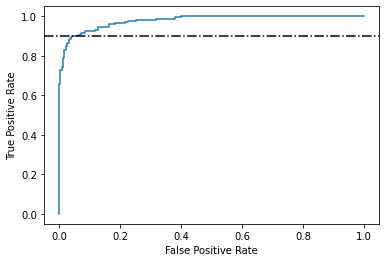

In [101]:
RocCurveDisplay(fpr=df_roc['fpr'], tpr=df_roc['tpr']).plot()
plt.axhline(y=0.9, ls='-.', color='black');

In [100]:
df_roc[df_roc['tpr'] >= 0.9]

,fpr,tpr,threshold
20,0.042105,0.900000,0.414766
21,0.059649,0.900000,0.396435
22,0.059649,0.905882,0.396244
23,0.070175,0.905882,0.379178
24,0.070175,0.917647,0.378520
25,0.084211,0.917647,0.354264
26,0.084211,0.923529,0.349009
27,0.115789,0.923529,0.328145
28,0.115789,0.929412,0.318751
29,0.126316,0.929412,0.314192


In [102]:
new_threshold = 0.414766
final_prediction = []

for proba in y_train_proba_pred[:, 1]:
    if proba >= new_threshold:
        final_prediction.append(1)
    else:
        final_prediction.append(0)

print(final_prediction, end='')

[0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 